# Victims of Mass Shootings Visualization

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
from datetime import datetime
import gmaps.datasets
import gmaps.geojson_geometries

from config import (census_key, gkey)

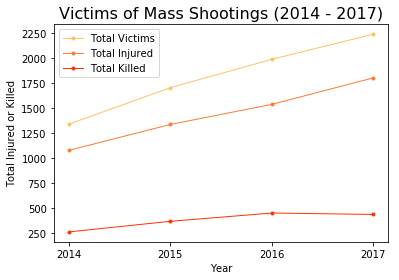

<Figure size 432x288 with 0 Axes>

In [4]:
#load in df from exploration data
totals_df = pd.read_csv("OutputFiles/Tina/totals_df.csv")
totals_df = pd.DataFrame(data = totals_df)
totals_df['Year'] = totals_df['Year'].astype(str) #change year to string for a neat x axis on graph

#create graph over time of those injured or killed
total, = plt.plot(totals_df['Year'], totals_df['Total Injured or Killed'], color = str('#ffc266'),linewidth=1, label ="Total Victims", marker = '.')
injured, = plt.plot(totals_df['Year'], totals_df['Total Injured'], color=str('#ff7a33'), linewidth=1, label="Total Injured", marker = ".")
killed, = plt.plot(totals_df['Year'], totals_df['Total Killed'], color=str('#ff3300'), linewidth=1, label="Total Killed", marker = ".")
plt.legend(handles=[total, injured, killed])
plt.xlabel('Year')
plt.title("Victims of Mass Shootings (2014 - 2017)",fontsize=16)
plt.ylabel('Total Injured or Killed')
plt.show()

plt.savefig("Images/Overall_Victims.png")

# Total Number of Mass Shootings Visualization

In [6]:
#load in df from exploration data
total_mass_shootings = pd.read_csv("OutputFiles/Tina/total_mass_shootings.csv")
total_mass_shootings = pd.DataFrame(data = total_mass_shootings)
total_mass_shootings.dtypes
total_mass_shootings['years'] = total_mass_shootings['years'].astype(str) #convert years to object for neat x axis on plot
total_mass_shootings

,years,total_shootings
0,2014,268
1,2015,335
2,2016,382
3,2017,346


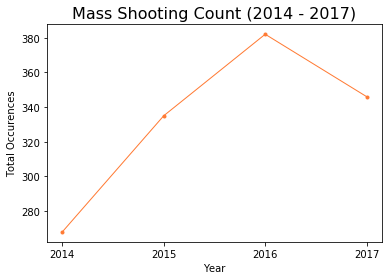

<Figure size 432x288 with 0 Axes>

In [7]:
#mass shooting count
colors = str('#ff7a33')
total, = plt.plot(total_mass_shootings['years'], total_mass_shootings['total_shootings'], color = colors,linewidth=1, marker = '.')

plt.xlabel('Year')
plt.title("Mass Shooting Count (2014 - 2017)", fontsize=16)
plt.ylabel('Total Occurences')
plt.show()
plt.savefig("Images/Overall_Count.png")

In [8]:
state_count_all = pd.read_csv("Outputfiles/Tina/state_count_all.csv")
#order counts for an organized visualization
state_count_all = state_count_all.sort_values(by=['total_count'], ascending = False) 

In [9]:
#replace null values with NaNs so states with no shootings are not included on the plot
state_count_null = state_count_all.replace({'0':np.nan, 0:np.nan})

In [10]:
#remove Puerto Rico
state_count_all = state_count_all.drop(51, axis = 0)

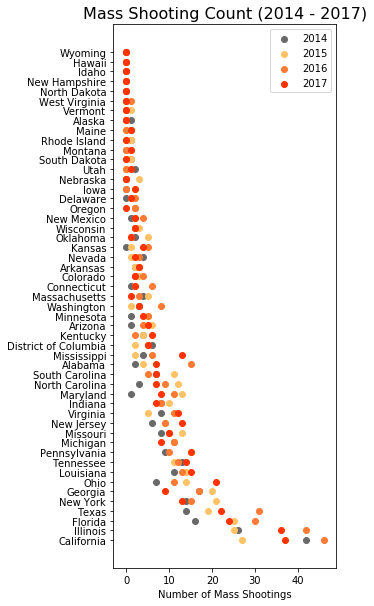

In [11]:
#state count overview
plt.figure(figsize=(4,10))
count_2014 = plt.scatter(state_count_all['Count_2014'],state_count_all['States'],color= 'dimgrey', linewidth=1, label="2014")
count_2015 = plt.scatter(state_count_all['Count_2015'],state_count_all['States'],color=str('#ffc266'), linewidth=1, label="2015")
count_2016 = plt.scatter(state_count_all['Count_2016'],state_count_all['States'],color=str('#ff7a33'), linewidth=1, label="2016")
count_2017 = plt.scatter(state_count_all['Count_2017'],state_count_all['States'],color=str('#ff3300'), linewidth=1, label="2017")
# Set our legend to where the chart thinks is best
plt.legend(handles=[count_2014, count_2015, count_2016, count_2017])
plt.xlabel('Number of Mass Shootings')
plt.title("Mass Shooting Count (2014 - 2017)",fontsize=16 )

plt.show()

In [17]:
#make same visualization for per capita - load in per capita by state
merged_all = pd.read_csv("OutputFiles/Tina/merged_all.csv")
merged_all = merged_all.sort_values(by=['Total Per Capita'], ascending = False) 

In [18]:
#replace null values with NaNs so states with no shootings are not included on the plot
#merged_all = merged_all.replace({'0':np.nan, 0:np.nan})
merged_all

,States,Per Capita Mass Shooting 2014,Per Capita Mass Shooting 2015,Per Capita Mass Shooting 2016,Per Capita Mass Shooting 2017,Total Per Capita
8,District of Columbia,9.467665,3.088879,7.587150,7.436150,20.143694
18,Louisiana,2.390759,3.026861,2.798305,3.216495,8.215925
13,Illinois,2.020399,1.941934,3.268054,2.800570,7.230387
42,Tennessee,2.015077,1.692408,1.832618,2.122054,5.540103
10,Georgia,1.715827,1.998662,1.683282,0.882212,5.397771
25,Missouri,1.327123,2.150378,1.650260,1.646009,5.127762
40,South Carolina,1.480769,2.302423,1.034211,1.430485,4.817403
0,Alabama,0.415138,0.828051,3.098428,1.443070,4.341617
20,Maryland,0.169843,2.192044,1.845668,1.334205,4.207555
24,Mississippi,1.340328,0.669326,2.007231,4.353330,4.016885


In [19]:
#remove Puerto Rico
merged_all = merged_all.drop(51, axis = 0)

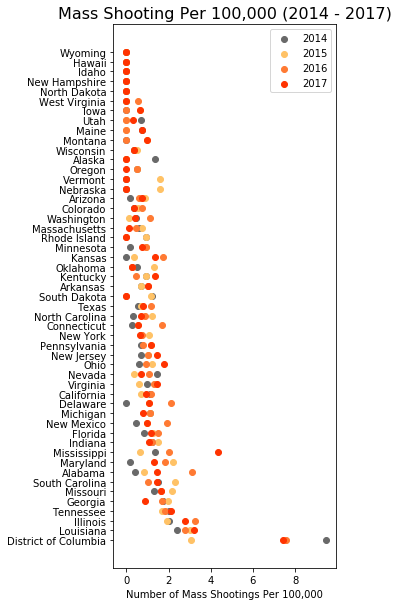

In [20]:
plt.figure(figsize=(4,10))
count_2014 = plt.scatter(merged_all['Per Capita Mass Shooting 2014'],merged_all['States'],color= 'dimgrey', linewidth=1, label="2014")
count_2015 = plt.scatter(merged_all['Per Capita Mass Shooting 2015'],merged_all['States'],color=str('#ffc266'), linewidth=1, label="2015")
count_2016 = plt.scatter(merged_all['Per Capita Mass Shooting 2016'],merged_all['States'],color=str('#ff7a33'), linewidth=1, label="2016")
count_2017 = plt.scatter(merged_all['Per Capita Mass Shooting 2017'],merged_all['States'],color=str('#ff3300'), linewidth=1, label="2017")
# Set our legend to where the chart thinks is best
plt.legend(handles=[count_2014, count_2015, count_2016, count_2017])
plt.xlabel('Number of Mass Shootings Per 100,000')
plt.title("Mass Shooting Per 100,000 (2014 - 2017)", fontsize=16)

plt.show()

# Heatmaps with gmaps

In [21]:
#load in df from exploration data
merged_2014 = pd.read_csv("OutputFiles/Tina/merged_2014.csv")
merged_2015 = pd.read_csv("OutputFiles/Tina/merged_2015.csv")
merged_2016 = pd.read_csv("OutputFiles/Tina/merged_2016.csv")
merged_2017 = pd.read_csv("OutputFiles/Tina/merged_2017.csv")

In [22]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [23]:
#2014 
#define location and heatpoint
locations = merged_2014[['Latitude', 'Longitude']]
rating = merged_2014['Mass Shooting Count']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [24]:
#2014
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2014[['Latitude', 'Longitude']], weights=merged_2014['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
#2015 
#define location and heatpoint
locations = merged_2015[['Latitude', 'Longitude']]
rating = merged_2015['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
#2015
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2015[['Latitude', 'Longitude']], weights=merged_2015['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
#2016 
#define location and heatpoint
locations = merged_2016[['Latitude', 'Longitude']]
rating = merged_2016['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
#2016
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2016[['Latitude', 'Longitude']], weights=merged_2016['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
#2017 
#define location and heatpoint
locations = merged_2017[['Latitude', 'Longitude']]
rating = merged_2017['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
#2017
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2017[['Latitude', 'Longitude']], weights=merged_2017['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]
# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Heatmaps Per Capita with gmaps

In [30]:
#2014 
#magnify mass shooting per capita so it shows up on the map
#merged_2014['Per Capita Mass exp'] = merged_2014['Per Capita Mass Shooting'] *1500000

#define location and heatpoint
locations = merged_2014[['Latitude', 'Longitude']]
rating = merged_2014['Per Capita Mass Shooting 2014']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [31]:
#2014
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2014[['Latitude', 'Longitude']], weights=merged_2014['Per Capita Mass Shooting 2014'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient =['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
#2015 
#magnify mass shooting per capita so it shows up on the map
merged_2015['Per Capita Mass exp'] = merged_2015['Per Capita Mass Shooting 2015'] *10

#define location and heatpoint
locations = merged_2015[['Latitude', 'Longitude']]
rating = merged_2015['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
#2015
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2015[['Latitude', 'Longitude']], weights=merged_2015['Per Capita Mass Shooting 2015'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
#2016 
#magnify mass shooting per capita so it shows up on the map
merged_2016['Per Capita Mass exp'] = merged_2016['Per Capita Mass Shooting 2016'] *10

#define location and heatpoint
locations = merged_2016[['Latitude', 'Longitude']]
rating = merged_2016['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
#2016
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2016[['Latitude', 'Longitude']], weights=merged_2016['Per Capita Mass Shooting 2016'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
#2017
#magnify mass shooting per capita so it shows up on the map
merged_2017['Per Capita Mass exp'] = merged_2017['Per Capita Mass Shooting 2017'] * 10

#define location and heatpoint
locations = merged_2017[['Latitude', 'Longitude']]
rating = merged_2017['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [31]:
#2017
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2017[['Latitude', 'Longitude']], weights=merged_2017['Per Capita Mass Shooting 2017'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient =  ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Scatter Plots with Census Data

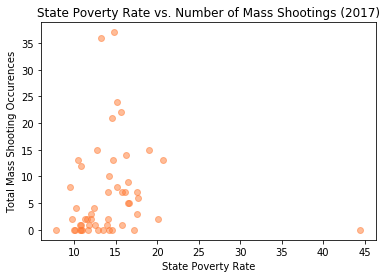

In [32]:
#Poverty Rates
plt.scatter(merged_2017['Poverty Rates'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Poverty Rate')
plt.title("State Poverty Rate vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()


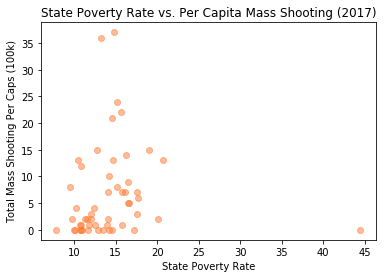

In [34]:
#Poverty Rates per capita
plt.scatter(merged_2017['Poverty Rates'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Poverty Rate')
plt.title("State Poverty Rate vs. Per Capita Mass Shooting (2017)")
plt.ylabel('Total Mass Shooting Per Caps (100k)')
plt.show()



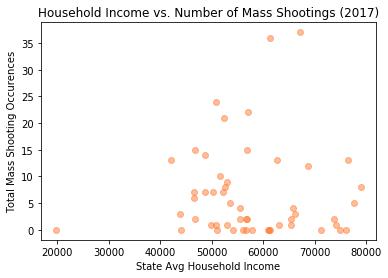

In [36]:
#Household Income
plt.scatter(merged_2017['Household Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Avg Household Income')
plt.title("Household Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

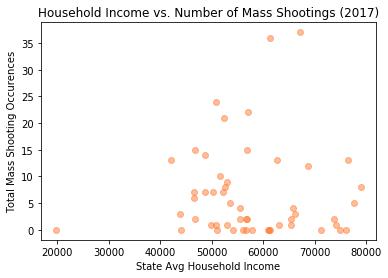

In [37]:
#Household Income
plt.scatter(merged_2017['Household Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Avg Household Income')
plt.title("Household Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()


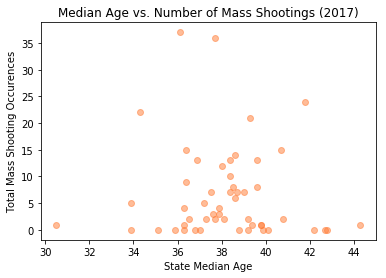

In [38]:
#Median Age
plt.scatter(merged_2017['Median Age'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Median Age')
plt.title("Median Age vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()


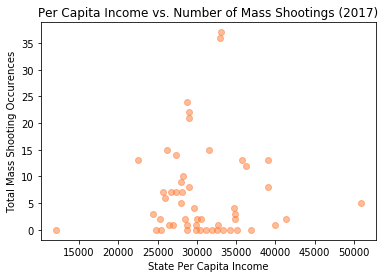

In [39]:
#Per Capita Income
plt.scatter(merged_2017['Per Capita Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Per Capita Income')
plt.title("Per Capita Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()


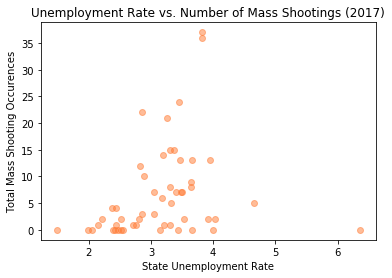

In [41]:
#Unemployment Rate
plt.scatter(merged_2017['Unemployment Rates'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Unemployment Rate')
plt.title("Unemployment Rate vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()


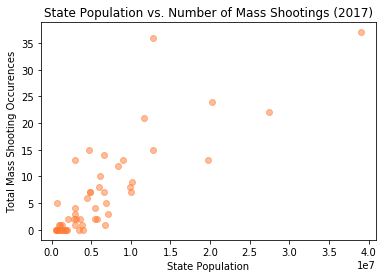

In [43]:

plt.scatter(merged_2017['Population'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Population')
plt.title("State Population vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()


# Hate Group Data

In [44]:
#2017 hate group count
hate_group_merged = pd.read_csv("Outputfiles/Tina/hate_group_merged.csv")


In [45]:
#2017 Hate Group Count
#define location and heatpoint
locations = hate_group_merged[['Latitude', 'Longitude']]
rating = hate_group_merged['Hate Group Count']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [46]:
#2017 Hate Group Count
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   hate_group_merged[['Latitude', 'Longitude']], weights=hate_group_merged['Hate Group Count'] , dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
#2017 Hate Group Count per Capita
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   hate_group_merged[['Latitude', 'Longitude']], weights=hate_group_merged['Per Capita Hate Group'] * 10 , dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
#load files for analysis
hate_group_merged = pd.read_csv("OutputFiles/Tina/hate_group_merged.csv")
hate_group_merged2 = pd.read_csv("OutputFiles/Tina/hate_group_merged2.csv")
hate_group_merged_2016 = pd.read_csv("OutputFiles/Tina/hate_group_merged_2016.csv")
hate_group_merged_2015 = pd.read_csv("OutputFiles/Tina/hate_group_merged_2015.csv")
hate_group_merged_2014 = pd.read_csv("OutputFiles/Tina/hate_group_merged_2014.csv")

#get the total count of hategroups per year
total_2017 = hate_group_merged['Hate Group Count'].sum()
total_2016 = hate_group_merged_2016['Hate Group Count'].sum()
total_2015 = hate_group_merged_2015['Hate Group Count'].sum()
total_2014 = hate_group_merged_2014['Hate Group Count'].sum()

In [48]:
#combine all totals for visualizations
totals = {'Year': ['2014', '2015','2016','2017'], 'Total Hate Groups': [total_2014, total_2015, total_2016, total_2017]}

#Review dataframe
totals_df = pd.DataFrame(data = totals)
totals_df


,Year,Total Hate Groups
0,2014,784.0
1,2015,892.0
2,2016,917.0
3,2017,954.0


Text(0,0.5,'Number of Groups')

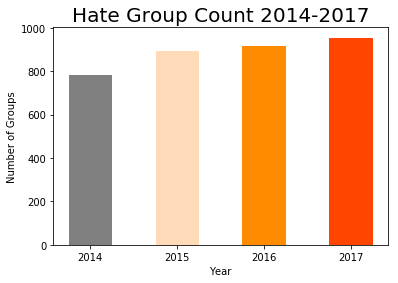

In [49]:
# Create a bar chart based upon the above data
plt.bar(totals_df['Year'], totals_df['Total Hate Groups'], width = 0.5, color=['grey','peachpuff','darkorange','orangered'] , align="center")
plt.title("Hate Group Count 2014-2017", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Number of Groups")

In [50]:
#check basis stats
hate_group_merged.sort_values(by=['Per Capita Hate Group'], ascending = False) 

,States,Hate Group Count,Mass Shooting Count,Total_Victims,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rates,Unemployment Count,Unemployment Rates,Latitude,Longitude,Per Capita Mass Shooting 2017,Per Capita Hate Group
8,District of Columbia,26,5.0,24.0,11,672391.0,33.9,77649.0,50832.0,111025.0,16.511970,31279.0,4.651906,38.9101,-77.0147,7.436150,3.866798
41,South Dakota,7,0.0,0.0,46,855444.0,36.8,54126.0,28761.0,114885.0,13.429868,17018.0,1.989376,44.4443,-100.2263,0.000000,0.818289
26,Montana,8,1.0,5.0,30,1029862.0,39.8,50801.0,28706.0,144198.0,14.001682,25076.0,2.434889,47.0527,-109.6333,0.971004,0.776803
12,Idaho,12,0.0,0.0,16,1657375.0,35.9,50985.0,25471.0,236000.0,14.239385,42328.0,2.553918,44.3509,-114.6130,0.000000,0.724037
29,New Hampshire,9,0.0,0.0,33,1331848.0,42.7,71305.0,36914.0,104470.0,7.843988,33566.0,2.520258,43.6805,-71.5811,0.000000,0.675753
42,Tennessee,37,14.0,70.0,47,6597381.0,38.6,48708.0,27277.0,1072360.0,16.254329,210756.0,3.194540,35.8580,-86.3505,2.122054,0.560829
1,Alaska,4,0.0,0.0,2,738565.0,33.9,76114.0,35065.0,73380.0,9.935483,29548.0,4.000731,64.0685,-152.2782,0.000000,0.541591
24,Mississippi,15,13.0,65.0,28,2986220.0,36.9,42009.0,22500.0,620007.0,20.762268,117786.0,3.944318,32.7364,-89.6678,4.353330,0.502307
27,Nebraska,9,0.0,0.0,31,1893921.0,36.3,56675.0,29866.0,220330.0,11.633537,38881.0,2.052937,41.5378,-99.7951,0.000000,0.475205
0,Alabama,23,7.0,44.0,1,4850771.0,38.7,46472.0,25746.0,849699.0,17.516782,165391.0,3.409582,32.7794,-86.8287,1.443070,0.474151


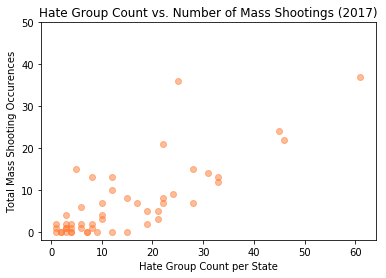

In [52]:
#2017 correlation (Nationalist Groups removed)
plt.scatter(hate_group_merged2['Hate Group Count'], hate_group_merged2['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2017)")
plt.ylim(top=50)
plt.ylabel('Total Mass Shooting Occurences')
plt.show()


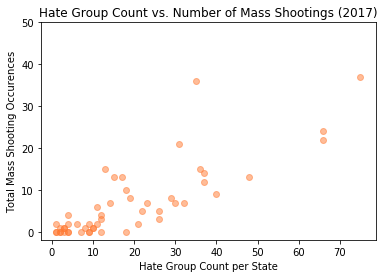

In [53]:
#2017 correlation
plt.scatter(hate_group_merged['Hate Group Count'], hate_group_merged['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2017)")
plt.ylim(top=50)
plt.ylabel('Total Mass Shooting Occurences')
plt.show()


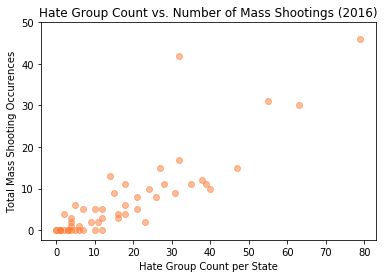

In [54]:
#2016 correlation
plt.scatter(hate_group_merged_2016['Hate Group Count'], hate_group_merged_2016['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2016)")
plt.ylim(top=50)
plt.ylabel('Total Mass Shooting Occurences')
plt.show()


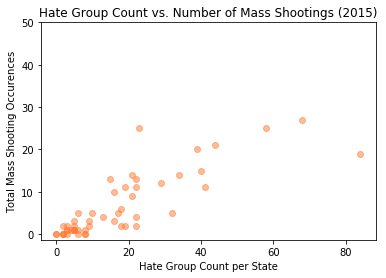

In [55]:
#2015 correlation
plt.scatter(hate_group_merged_2015['Hate Group Count'], hate_group_merged_2015['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2015)")
plt.ylim(top=50)
plt.ylabel('Total Mass Shooting Occurences')
plt.show()


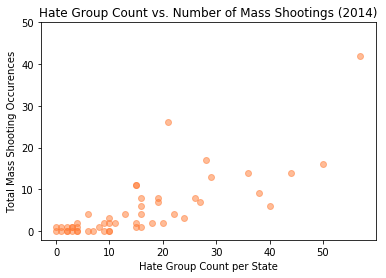

In [56]:
#2014 correlation
plt.scatter(hate_group_merged_2014['Hate Group Count'], hate_group_merged_2014['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2014)")
plt.ylim(top=50)
plt.ylabel('Total Mass Shooting Occurences')
plt.show()


# Regression

In [58]:
#correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

#load files for analysis
linear = pd.read_csv("OutputFiles/Tina/linear_with_dummies.csv")
linear.columns


Index(['States', 'Total_Victims', 'Unemployment Count', 'Unemployment Rates',
       'GRADE number', 'Gun Check Totals', 'Hate Group Count',
       'Household Income', 'Latitude', 'Longitude', 'Mass Shooting Count',
       'Median Age', 'Per Capita Hate Group', 'Per Capita Income',
       'Per Capita Mass Shooting', 'Population', 'Poverty Count',
       'Poverty Rates', 'Election_Result_B', 'Election_Result_R'],
      dtype='object')

In [60]:
#create df with only relevant variables for scatter plot
linear_corrplot = linear[['Per Capita Mass Shooting', 'GRADE number', 'Gun Check Totals', 'Per Capita Hate Group', 'Poverty Rates',
                         'Election_Result_B', 'Election_Result_R']]

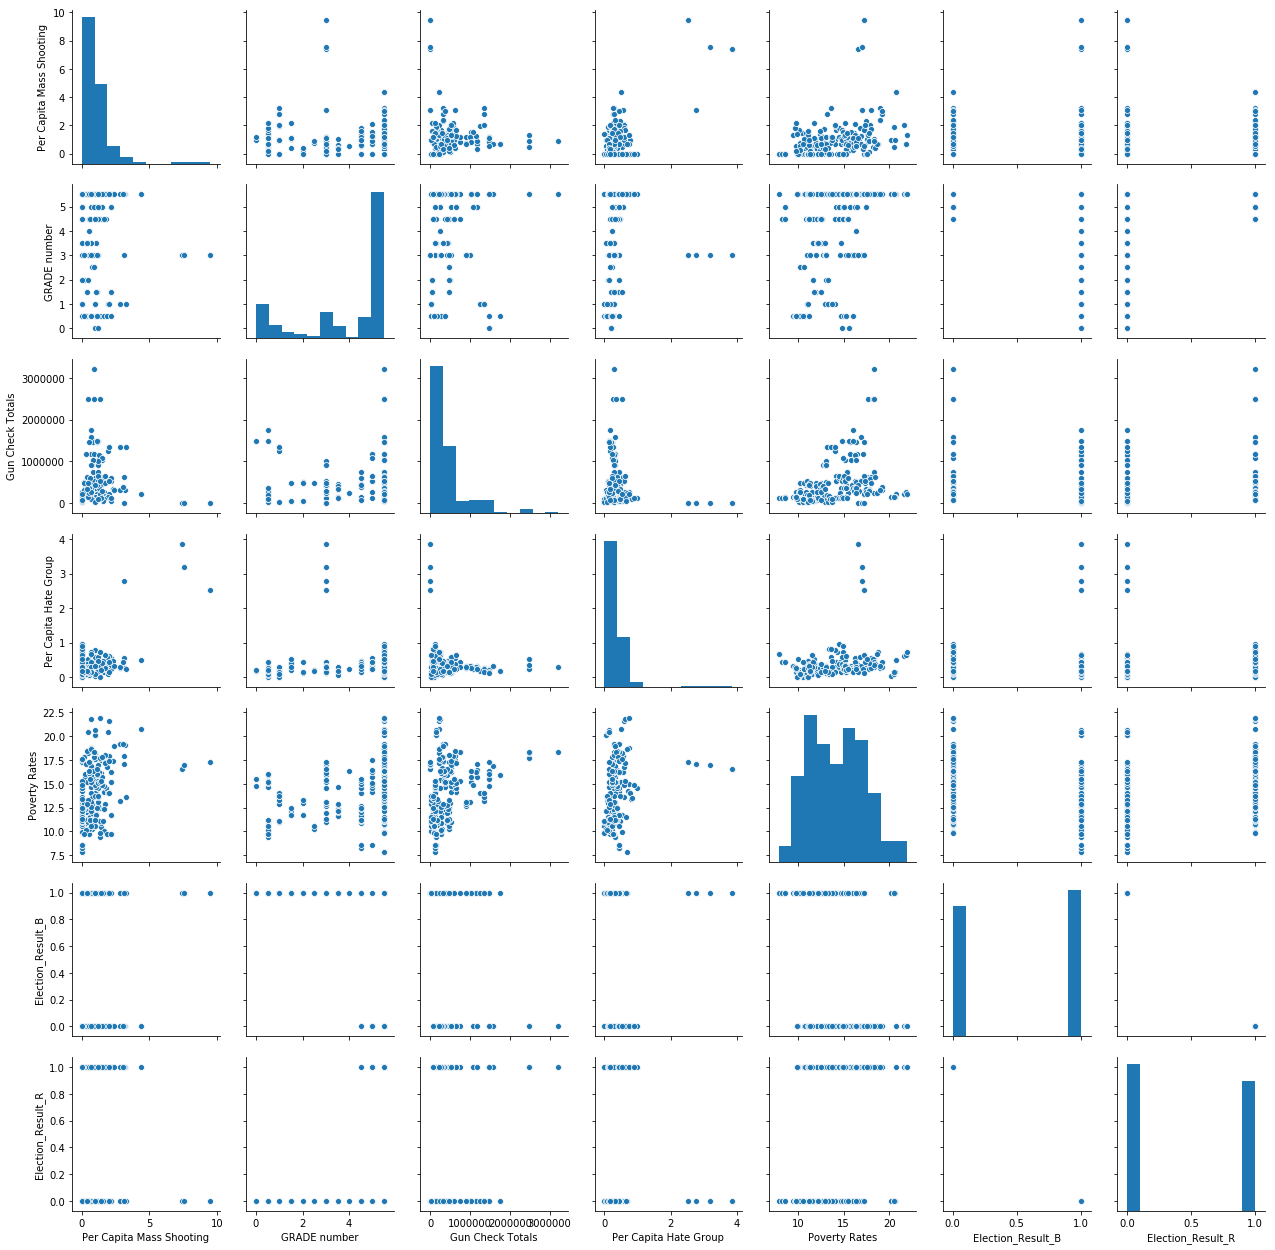

<Figure size 432x288 with 0 Axes>

In [61]:
# Basic correlogram
sns.pairplot(linear_corrplot)
plt.show()
plt.savefig('Correlation.png')

In [62]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [63]:
x_data = linear[['GRADE number', 'Gun Check Totals', 'Per Capita Hate Group', 'Poverty Rates',
                         'Election_Result_B', 'Election_Result_R']]
y_data = linear['Per Capita Mass Shooting']

##Adding constant term to the linear regression model
x_data = sm.add_constant(x_data)
model = sm.OLS(y_data, x_data).fit()
predictions = model.predict(x_data)

print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Per Capita Mass Shooting   R-squared:                       0.530
Model:                                  OLS   Adj. R-squared:                  0.519
Method:                       Least Squares   F-statistic:                     44.72
Date:                      Sat, 30 Mar 2019   Prob (F-statistic):           9.42e-31
Time:                              14:36:42   Log-Likelihood:                -246.05
No. Observations:                       204   AIC:                             504.1
Df Residuals:                           198   BIC:                             524.0
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------